In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

feature_cols = [
    "blueGoldDiff", "blueKills", "blueDeaths", "blueAssists",
    "blueTowersDestroyed", "blueEliteMonsters", "blueDragons",
    "blueHeralds", "blueWardsPlaced", "blueWardsDestroyed", "blueAvgLevel"
]

x = df[feature_cols]
y = df["blueWins"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       990
           1       0.71      0.69      0.70       986

    accuracy                           0.70      1976
   macro avg       0.71      0.70      0.70      1976
weighted avg       0.71      0.70      0.70      1976



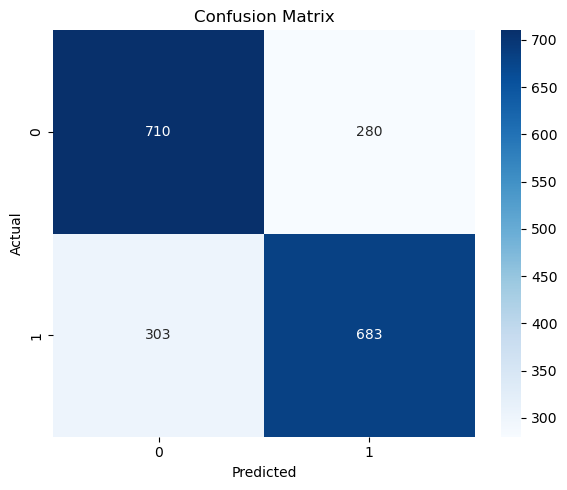

In [16]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [25]:
wrong_preds = x_test.copy()
wrong_preds["true"] = y_test
wrong_preds["pred"] = y_pred

wrong_samples = wrong_preds[wrong_preds["true"] != wrong_preds["pred"]].sample(5, random_state=42)
wrong_indices = wrong_samples.index
red_columns = [col.replace("blue", "red") for col in feature_cols]
wrong_positions = x_test.index.get_indexer(wrong_indices)

comparison = df.loc[wrong_indices, feature_cols + red_columns + ["blueWins"]]
comparison["predicted_blueWins"] = y_pred[wrong_positions]
print(comparison)

      blueGoldDiff  blueKills  blueDeaths  blueAssists  blueTowersDestroyed  \
7880         -2195          4           7            7                    0   
4337          -344          4           4            2                    0   
7740          -387          4          10            2                    0   
2368          2123          5           2            4                    0   
9116           724          9           7           13                    0   

      blueEliteMonsters  blueDragons  blueHeralds  blueWardsPlaced  \
7880                  0            0            0               13   
4337                  1            1            0               12   
7740                  0            0            0               12   
2368                  2            1            1               38   
9116                  1            1            0               18   

      blueWardsDestroyed  blueAvgLevel  redGoldDiff  redKills  redDeaths  \
7880                   1    